In [3]:
import pandas as pd

file_path = "~/Downloads/Iphone_Dataset.csv"
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.describe())

   Year  No_of_iPhone_Users  No_of_iPhone_Users_USA  \
0  2023          1460000000               153000000   
1  2022          1360000000               149000000   
2  2021          1230000000               141000000   
3  2020          1000000000               138000000   
4  2019           948000000               131000000   

   Percentage_of_iPhone_Users  No_of_iPhone_Sold  No_of_iPhone_Sold_USA  \
0                       58.33          234600000                    NaN   
1                       48.70          226400000            124700000.0   
2                       46.90          235700000            116300000.0   
3                       45.30          206100000            113500000.0   
4                       45.20          191000000            105200000.0   

   iOS_Market_Share  Android_Market_Share  
0             58.10                 41.46  
1             56.74                 42.94  
2             58.58                 41.11  
3             59.54                 40.20 

In [4]:
print(df.isna().sum())

Year                          0
No_of_iPhone_Users            0
No_of_iPhone_Users_USA        0
Percentage_of_iPhone_Users    3
No_of_iPhone_Sold             0
No_of_iPhone_Sold_USA         2
iOS_Market_Share              2
Android_Market_Share          2
dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_scale = ['No_of_iPhone_Users', 'No_of_iPhone_Users_USA', 'Percentage_of_iPhone_Users',
                     'No_of_iPhone_Sold', 'No_of_iPhone_Sold_USA', 'iOS_Market_Share', 'Android_Market_Share']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df.head())

   Year  No_of_iPhone_Users  No_of_iPhone_Users_USA  \
0  2023            1.654962                1.207853   
1  2022            1.413471                1.095495   
2  2021            1.099531                0.870778   
3  2020            0.544100                0.786509   
4  2019            0.418524                0.589882   

   Percentage_of_iPhone_Users  No_of_iPhone_Sold  No_of_iPhone_Sold_USA  \
0                    3.136870           0.945431               0.000000   
1                    0.629353           0.747585               1.507316   
2                    0.160658           0.971972               1.126437   
3                   -0.255959           0.257794               0.999477   
4                   -0.281998          -0.106533               0.623133   

   iOS_Market_Share  Android_Market_Share  
0          1.212213             -0.778162  
1          0.663839             -0.057133  
2          1.405756             -0.948675  
3          1.792843             -1.392010 

In [8]:
X = df.drop(columns=['iOS_Market_Share'])
y = df['iOS_Market_Share']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer with the same shape
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - loss: 158973.3281 - mae: 398.7139 - val_loss: 127925.2266 - val_mae: 357.6652
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 128329.8750 - mae: 358.2309 - val_loss: 101168.4688 - val_mae: 318.0685
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 101549.1406 - mae: 318.6670 - val_loss: 78146.1250 - val_mae: 279.5443
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78473.1172 - mae: 280.1295 - val_loss: 59760.9219 - val_mae: 244.4582
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 60057.0469 - mae: 245.0642 - val_loss: 44091.1094 - val_mae: 209.9760
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 44354.0000 - mae: 210.6025 - val_loss: 31071.6465 - val_mae: 176.2681
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31299.3828 - mae: 176.9147 - val_loss: 21110.5117 - val_mae: 145.2902
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21311.8789 - mae: 145.9839 - val_loss: 13429.107

In [14]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Mean Absolute Error:", test_mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 350.0441 - mae: 18.6873
Test Mean Absolute Error: 18.687347412109375


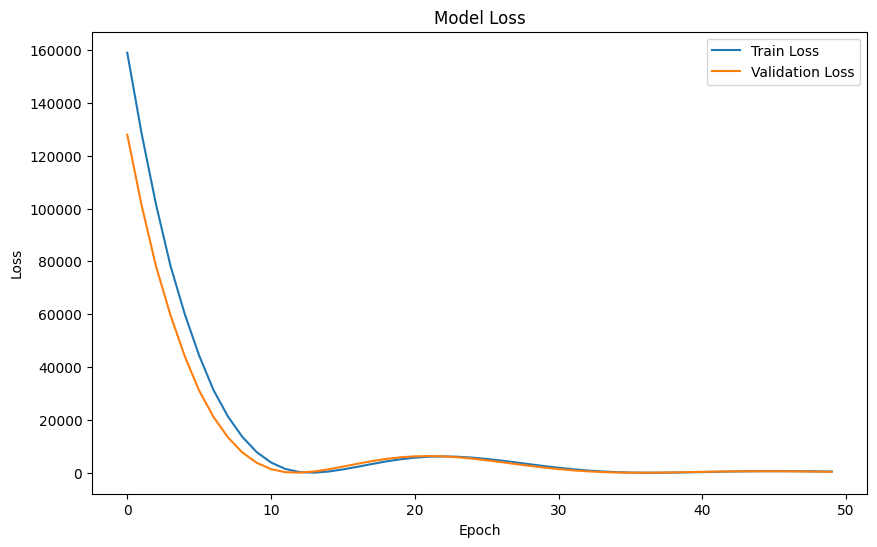

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [17]:
y_pred = model.predict(X_test)

for i in range(min(len(y_pred), len(y_test))):  
    print(f"Predicted: {y_pred[i][0]}, Actual: {y_test.iloc[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted: 18.534160614013672, Actual: 0.0
Predicted: 18.74349594116211, Actual: -1.126437715072033
Predicted: 18.870159149169922, Actual: 1.2122126663661603
